Team members:
- Sophia Gabriela Martinez Albarran A01424430
- Eduardo Botello Casey A01659281
- Marcos Saade Romano A01784220

## Dataset description

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). It contains 6 integers variables and 11 categorical variables. It has 45211 instances of data, where we will be performing a cleaning and preprocessing before creating the models.

In [2]:
import sklearn 
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd

  
# https://archive.ics.uci.edu/dataset/222/bank+marketing  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# Drop the column duration because in the page it says it isn't necessary for a predictive model
X = X.drop(columns=['duration'])

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  campaign     45211 non-null  int64 
 12  pdays        45211 non-null  int64 
 13  previous     45211 non-null  int64 
 14  poutcome     8252 non-null   object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [4]:
X.describe()

,age,balance,day_of_week,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


Filling NANs with the values associated with unknown in the database

In [5]:
X.job = X.job.fillna('unknown')
X.education = X.education.fillna('unknown')
X.poutcome = X.poutcome.fillna('nonexistent')
X.contact = X.contact.fillna('unknown')


In [6]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))
X_encoded_df = pd.DataFrame(
    X_encoded.toarray(), 
    columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
)


In [7]:
X_numerico = X.select_dtypes(exclude=['object'])
X_final = pd.concat([X_numerico.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

In [8]:
X_final

,age,balance,day_of_week,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_other,poutcome_success
0,58,2143,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,29,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,2,5,1,-1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1506,5,1,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,33,1,5,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,1729,17,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,72,5715,17,5,184,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,668,17,4,-1,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


[419586148509.0515, 198724205146.1919, 110100938982.75485, 70163637849.43028, 45824115762.16617, 33087847734.650627, 26016817500.23999, 20162858575.18463, 16314008772.908667]


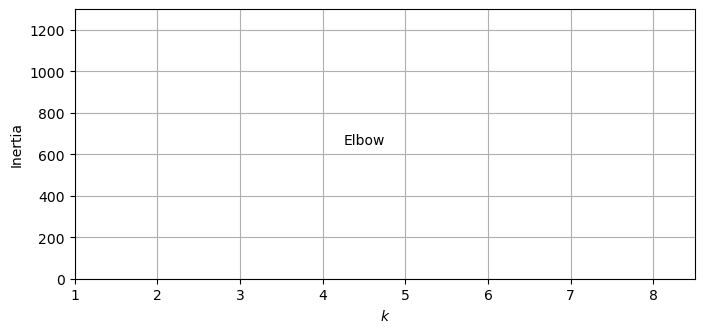

In [9]:
from sklearn.cluster import KMeans
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X_final)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
# save_fig("inertia_vs_k_plot")
plt.show()

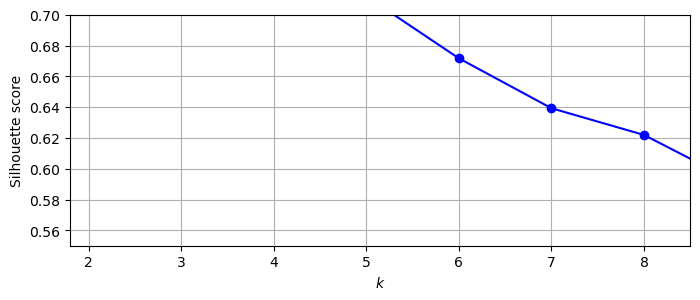

In [10]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_final, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.grid()
#save_fig("silhouette_score_vs_k_plot")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_binario, test_size=0.2, random_state=42, stratify=y_binario
)


NameError: name 'y_binario' is not defined